
# SUICIDE RATE REPORT (1985 to 2016) (Prototype)
Written by <a href="http://nuttaphat.info/">Nuttaphat Arunoprayoch</a> <br>
Dataset Provided by  <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">Kaggle</a> <br>
<b>NOTE:</b> This is an analysis page, the graphs generated in this page will be moved to a Medium article in the future


## **1. Introduction**


Due to a high competion in every field nowadays. We cannot deny that we must speed our pace to get ahed of others. What does it lead to? It leads to anxiety, depression, and endless tiring situations. As a consequence, suicide rates sky rocket daily and they seem to not soon decrease.

## **2. Objectives**

The main objectives of this short report are to raise the awareness of suicide rates, and provide insightful information for future research and usage.

## **3. Data Analysis (on-going)**

In [4]:
# Hide code cells for clean presentation and import display table
from IPython.display import display, HTML, clear_output, IFrame

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [ ]:
# Import Data Manipluation Libraries
import pandas as pd
import numpy as np

In [2]:
# Import Data Visualization

import matplotlib.pyplot as plt

import seaborn as sns

from bokeh.core.properties import value
from bokeh.io import show, save, output_notebook, export_png, export_svgs
from bokeh.layouts import column, gridplot
from bokeh.plotting import figure, output_file
from bokeh.models.glyphs import HBar
from bokeh.models import ColumnDataSource, Legend, HoverTool, layouts, CustomJS, Select, Circle, RangeTool
from bokeh.models import Toggle, BoxAnnotation, Div, Row
from bokeh.models import LinearColorMapper, ColorBar, BasicTicker, PrintfTickFormatter
from bokeh.palettes import all_palettes
from bokeh.transform import cumsum, jitter, transform
from bokeh.embed import file_html, components


import plotly 
plotly.tools.set_credentials_file(username='', api_key='')
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


The table below shows an example of the dataset which contains several factors that will be analysed

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nat236919/Data_Science/master/Project_1_Suicide_Rate/master.csv')

display(df.head(5))

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Countries

By analysing the dataset based on countries and 'suicides/100k pop', the author depicts the results as a world map below. However, due to missing values from some countires, the world map is not fully complete.

<div>
    <a href="https://plot.ly/~nat236919/39/?share_key=VU05HEvj2LNoK6hMcAH99K" target="_blank" title="suicide-world-map" style="display: block; text-align: center;"><img src="https://plot.ly/~nat236919/39.png?share_key=VU05HEvj2LNoK6hMcAH99K" alt="suicide-world-map" style="max-width: 100%;width: 80%;"  width="1200" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="nat236919:39" sharekey-plotly="VU05HEvj2LNoK6hMcAH99K" src="https://plot.ly/embed.js" async></script>
</div>


In [ ]:
# df_grouped_country = df.groupby(['country'])['suicides/100k pop'].mean().reset_index()
# df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')[['COUNTRY', 'CODE']]

# df_grouped_country['country_label'] = df_grouped_country['country']
# my_dict = pd.Series(df_code.CODE.values, index=df_code.COUNTRY).to_dict() # Create dict contain full country names and shortened names
# df_grouped_country.replace({'country': my_dict}, inplace=True) # Replace country names

# # df_grouped_country.head(5)

# data = [go.Choropleth(
#     locations = df_grouped_country['country'],
#     z = df_grouped_country['suicides/100k pop'],
#     text = df_grouped_country['country_label'],
#     colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
#                 [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
#                 [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'],
#                 [1.0, 'rgb(49,54,149)']],
#     autocolorscale = False,
#     reversescale = True,
#     marker = go.choropleth.Marker(
#         line = go.choropleth.marker.Line(
#             color = 'rgb(180,180,180)',
#             width = 0.5
#         )),
#     colorbar = go.choropleth.ColorBar(
#         tickprefix = '',
#         title = 'Average Suicide Rate<br>(per 100k population)'),
# )]

# layout = go.Layout(
#     title = go.layout.Title(
#         text = 'Suicide Rates Overview 1985 to 2016'
#     ),
#     geo = go.layout.Geo(
#         showframe = False,
#         showcoastlines = False,
#         projection = go.layout.geo.Projection(
#             type = 'equirectangular'
#         )
#     ),
#     annotations = [go.layout.Annotation(
#         x = 0.55,
#         y = 0.1,
#         xref = 'paper',
#         yref = 'paper',
#         text = 'Source: <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">\
#             Kaggle</a>',
#         showarrow = False
#     )]
# )

# fig = go.Figure(data = data, layout = layout)
# py.iplot(fig, filename = 'suicide-world-map')

Interesingly, based on the data collected from 1985 to 2016. Lithuania had the highest suicide rates per 100k people. Followed by Sri Lanka and Russia respectively. The chart below shows the top 10 highest suicide rates.

In [ ]:
df_grouped_country = df_grouped_country.sort_values(by=['suicides/100k pop'], ascending=False)
df_grouped_country.head(10)

x = df_grouped_country['suicides/100k pop'][:10].tolist()[::-1]
y = df_grouped_country['country_label'][:10].tolist()[::-1]

data = [go.Bar(
            x=x,
            y=y,
            marker=dict(
            color='rgba(50, 171, 96, 0.6)',
            line=dict(
                color='rgba(50, 171, 96, 1.0)',
                width=1),
        ),
            orientation = 'h',
)]

py.iplot(data, filename='horizontal-bar')

## Gender and Age

By explroing regarding sex and age range, it was found that 79% of the participants were males, and 21% were females. And most of them were aged more than 75 years old.

In [ ]:
df_grouped_sex_sr = df.groupby(['sex'])['suicides/100k pop'].mean().reset_index()
df_grouped_age_sr = df.groupby(['age'])['suicides/100k pop'].mean().reset_index()

df_grouped_sex_sr.head()
df_grouped_age_sr.head()

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

# Plot Donut Charts
fig = {
  "data": [
    {
      "values": df_grouped_sex_sr['suicides/100k pop'].tolist(),
      "labels": df_grouped_sex_sr['sex'].tolist(),
      "domain": {"column": 0},
      "name": "Sex",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },

    {
      "values": df_grouped_age_sr['suicides/100k pop'].tolist(),
      "labels": df_grouped_age_sr['age'].tolist(),
      "text":['Age'],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "Age Range",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Suicide Rate by Gender and Age Range (1985 to 2016)",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Gender",
                "x": 0.215,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Age",
                "x": 0.775,
                "y": 0.5
            }
        ]
    }
}

py.iplot(fig, filename='donut')

## Suicide Rates on Gender and Age

According to the results, it can be said that Males had higher suicide rates compared to females in every age range. It is noticable that those who aged more than 75 years old had the highest suicide rates compared to the others.

In [ ]:
df_grouped_sex_age = df.groupby(['sex', 'age'])['suicides/100k pop'].mean().reset_index()

display(df_grouped_sex_age)


x_label = list(df_grouped_sex_age['age'])[:6]

y_female = df_grouped_sex_age['suicides/100k pop'][:6].tolist()
y_male = df_grouped_sex_age['suicides/100k pop'][6:].tolist()


trace1 = go.Bar(
    x= x_label,
    y=y_female,
    name='Female',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x= x_label,
    y=y_male,
    name='Male',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Suicide Rate between Male and Female (1985-2016)'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

,sex,age,suicides/100k pop
0,female,15-24 years,4.328018
1,female,25-34 years,4.573210
2,female,35-54 years,5.916480
3,female,5-14 years,0.462252
4,female,55-74 years,7.123447
5,female,75+ years,9.919802
6,male,15-24 years,13.566290
7,male,25-34 years,19.800560
8,male,35-54 years,23.978402
9,male,5-14 years,0.777831


## Correlatiosn among Factors

By revealing correlations among factors provided by the dataset. It was found that the information was not enough for discovering the main factor of an increasing suicide rates.


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


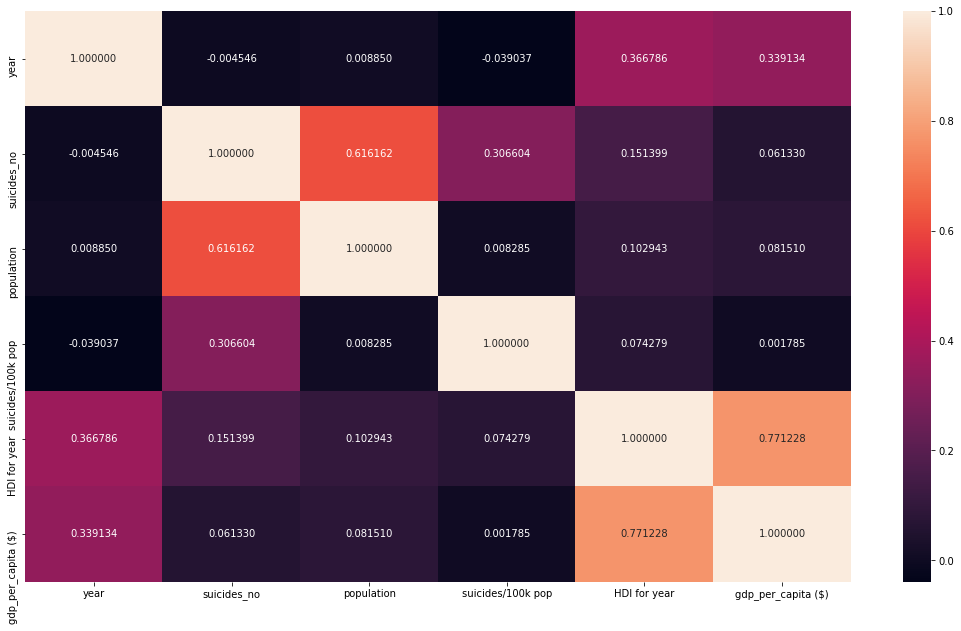

In [21]:
sub_df = df[:] #Subsetting the data
cor = sub_df.corr() #''Calculate the correlation of the above variables
display(cor)

# Display Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.heatmap(cor, annot=True, square=False, fmt='f') # Plot the correlation as heat map

## Suicide Rate During Years

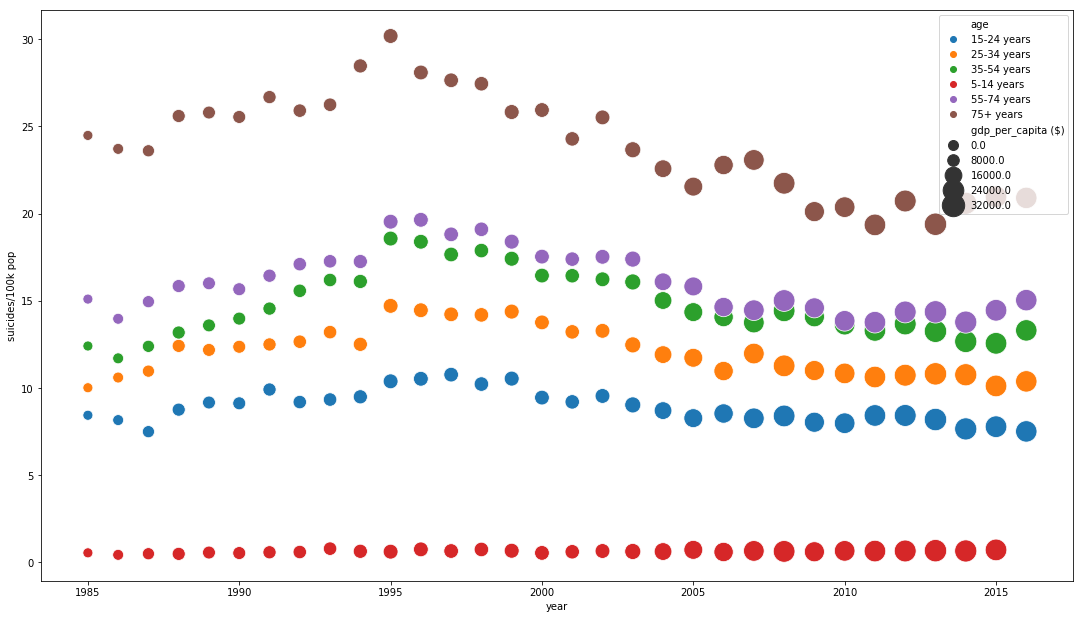

In [34]:
# Display Bubble Charts

df_temp = df.groupby(['age', 'year'])[['suicides/100k pop', 'gdp_per_capita ($)']].mean().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax = sns.scatterplot(x='year', y='suicides/100k pop',
                     hue="age", size='gdp_per_capita ($)',
                     sizes=(100, 500), data=df_temp)